Train set: (546, 9) (546,)
Test set: (137, 9) (137,)
[2 4 2 4 2]
[2 4 2 4 2]
              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

   micro avg       0.96      0.96      0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137

Confusion matrix, without normalization
[[85  5]
 [ 0 47]]

F1_Score is  0.9639038982104676
Jaccard Similarity Score is  0.9635036496350365

F1_Score with linear kernel is  0.9639038982104676
Jaccard Similarity Score with linear kernel is  0.9635036496350365


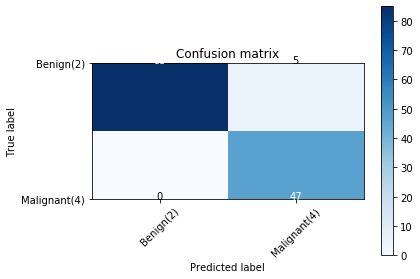

In [38]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt

df = pd.read_csv('cell_samples.csv')
df.head(5)

df.dtypes

df = df[pd.to_numeric(df['BareNuc'], errors='coerce').notnull()] #only rows that can be converted to numeric
df['BareNuc'] = df['BareNuc'].astype('int')


x = np.asarray(df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']])
y = np.asarray(df['Class'])
y [10:15]

#Train and Test Split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

#Model Creation and Training 
from sklearn import svm
svm_model = svm.SVC(kernel='rbf', gamma='scale')
svm_model.fit(X_train,y_train)

#Prediction on Test
y_predict=svm_model.predict(X_test)
print(y_predict[0:5])
print(y_test[0:5])


from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_predict, labels=[2,4])
np.set_printoptions(precision=2)

print (classification_report(y_test, y_predict))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(2)','Malignant(4)'],normalize= False,  title='Confusion matrix')

from sklearn.metrics import f1_score
print('\nF1_Score is ',f1_score(y_test,y_predict,average='weighted'))

from sklearn.metrics import jaccard_similarity_score
print('Jaccard Similarity Score is ', jaccard_similarity_score(y_test,y_predict))


# USING LINEAR KERNEL

model_svm_2 = svm.SVC(kernel='linear')
model_svm_2.fit(X_train,y_train)

y_predict2=model_svm_2.predict(X_test)

print('\nF1_Score with linear kernel is ',f1_score(y_test,y_predict2,average='weighted'))
print('Jaccard Similarity Score with linear kernel is ', jaccard_similarity_score(y_test,y_predict2))